In [1]:
import tweepy
import pandas as pd
import requests
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
API_key = 'kYVk9ATAhWUHUTEoFetJvGkgF'
API_key_Secret = '0y9cmKrYQEypxrXHafa0PRz5YsvqPCWl3hcSMKlDj0IjbcxIGH'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAPzJlgEAAAAALd6D9cbOI3VmCgBKmhaY6axJyGM%3DkUdMjiaRK0ITzugDllPm2DeXZmrbys3IlUAgw7cxGnn7DOr550'
bearer_token1 = 'AAAAAAAAAAAAAAAAAAAAAB9VlgEAAAAAJCGxzM2Ku1gE8%2BNu2beZM%2BHqXBQ%3DUnLnGnuRo5STzcDpcrNi6XceuyzykBAlPRHykvddcQ4srqVtL4'
authorize = tweepy.OAuth2BearerHandler(bearer_token)

In [3]:
client1 = tweepy.Client(bearer_token, wait_on_rate_limit=True)
client2 = tweepy.Client(bearer_token1, wait_on_rate_limit=True)

IIT_resource = client1.get_user(username='iitarc')
response_data, includes, errors, meta = IIT_resource

print(response_data.id)
print(response_data.name)
print(response_data.username)


992976378
IIT Resource Center
iitarc


In [4]:
followers = client1.get_users_followers(response_data.id, max_results=500)
followers_data = followers.data
following = client2.get_users_following(response_data.id, max_results=500)
following_data=following.data

In [6]:
connections = pd.DataFrame(columns=["source_username","target_username"])

In [7]:
for user in followers_data:
    connections.loc[len(connections.index)] = [response_data.username,user.username]

for user in following_data:
    connections.loc[len(connections.index)] = [user.username,response_data.username]

In [8]:
connections.describe()

source_username target_username
count              516             516
unique              88             430
top             iitarc          iitarc
freq               429              87

In [9]:
# Exporting followers and following data to csv file
connections.to_csv("./IITARC_Connections.csv", index=False)

In [10]:
totalusers_IITARC = set(followers.data)
totalusers_IITARC.update(set(following.data))
totalusers_IITARC_list = list(totalusers_IITARC)

main_users_data = [user['username'] for user in followers.data]
main_users_data.append([user['username'] for user in following.data])

In [12]:
followers_dict, following_dict = {}, {}

In [36]:
len(totalusers_IITARC_list)

459

In [13]:
def retrieve_Connections():
    try:
        i=0
        while i<len(totalusers_IITARC_list):
            user = totalusers_IITARC_list[i]
            if ((user.username not in followers_dict.keys()) or user.username not in following_dict.keys()):
                followers_dict[user.username] = client1.get_users_followers(user.id,max_results=750)
                following_dict[user.username] = client2.get_users_following(user.id,max_results=750)
            i+=1
    except Exception as e:
        print("Exception occured")
        retrieve_Connections()
    finally:
        print("done")
retrieve_Connections()

Rate limit exceeded. Sleeping for 896 seconds.
Rate limit exceeded. Sleeping for 897 seconds.
Rate limit exceeded. Sleeping for 895 seconds.
Rate limit exceeded. Sleeping for 896 seconds.
Rate limit exceeded. Sleeping for 893 seconds.
Rate limit exceeded. Sleeping for 896 seconds.
Rate limit exceeded. Sleeping for 895 seconds.
Rate limit exceeded. Sleeping for 898 seconds.
Rate limit exceeded. Sleeping for 899 seconds.
Rate limit exceeded. Sleeping for 898 seconds.
Rate limit exceeded. Sleeping for 897 seconds.
Rate limit exceeded. Sleeping for 896 seconds.
Rate limit exceeded. Sleeping for 897 seconds.
Rate limit exceeded. Sleeping for 896 seconds.
Rate limit exceeded. Sleeping for 896 seconds.
Rate limit exceeded. Sleeping for 897 seconds.
Rate limit exceeded. Sleeping for 896 seconds.
Rate limit exceeded. Sleeping for 897 seconds.
Rate limit exceeded. Sleeping for 895 seconds.
Rate limit exceeded. Sleeping for 897 seconds.
Rate limit exceeded. Sleeping for 896 seconds.
Rate limit ex

done


In [35]:
len(followers_dict)

459

In [14]:
all_connections = []
keys = [*followers_dict]
values = list(followers_dict.values())
i=0
while i < len(followers_dict):
    if values[i].data is not None:
        for user in values[i].data:
            if user.username in main_users_data:
                all_connections.append([keys[i],user.username])
    i+=1

In [15]:
keys = [*following_dict]
values = list(following_dict.values())
i=0
while i < len(following_dict):
    if values[i].data is not None:
        for user in values[i].data:
            if user.username in main_users_data:
                all_connections.append([user.username,keys[i]])
    i+=1

In [17]:
all_connections_df = pd.DataFrame(all_connections,columns=["target_username","source_username"])
all_connections_unique = all_connections_df.copy(deep=True)
all_connections_unique.drop_duplicates(["target_username", "source_username"], inplace=True)
all_connections_unique.describe()

target_username source_username
count             7640            7640
unique             289             430
top      IITCampusLife   iitalumniassn
freq               260             205

In [18]:
# Exporting all connections data to csv file
all_connections_unique.to_csv("./Internal_user_connections.csv",index=False)

In [19]:
user_connections_df=connections[["target_username", "source_username"]]
final_all_connections = pd.concat([user_connections_df, all_connections_unique])
final_all_connections.describe()

target_username source_username
count             8156            8156
unique             447             448
top      IITCampusLife          iitarc
freq               261             429

In [20]:
# Exporting all users list of connections to csv file
final_all_connections.to_csv("./Final_connections_list.csv",index=False)

In [21]:
graph = nx.from_pandas_edgelist(
    final_all_connections, 'source_username', 'target_username')
position = nx.spring_layout(graph) 

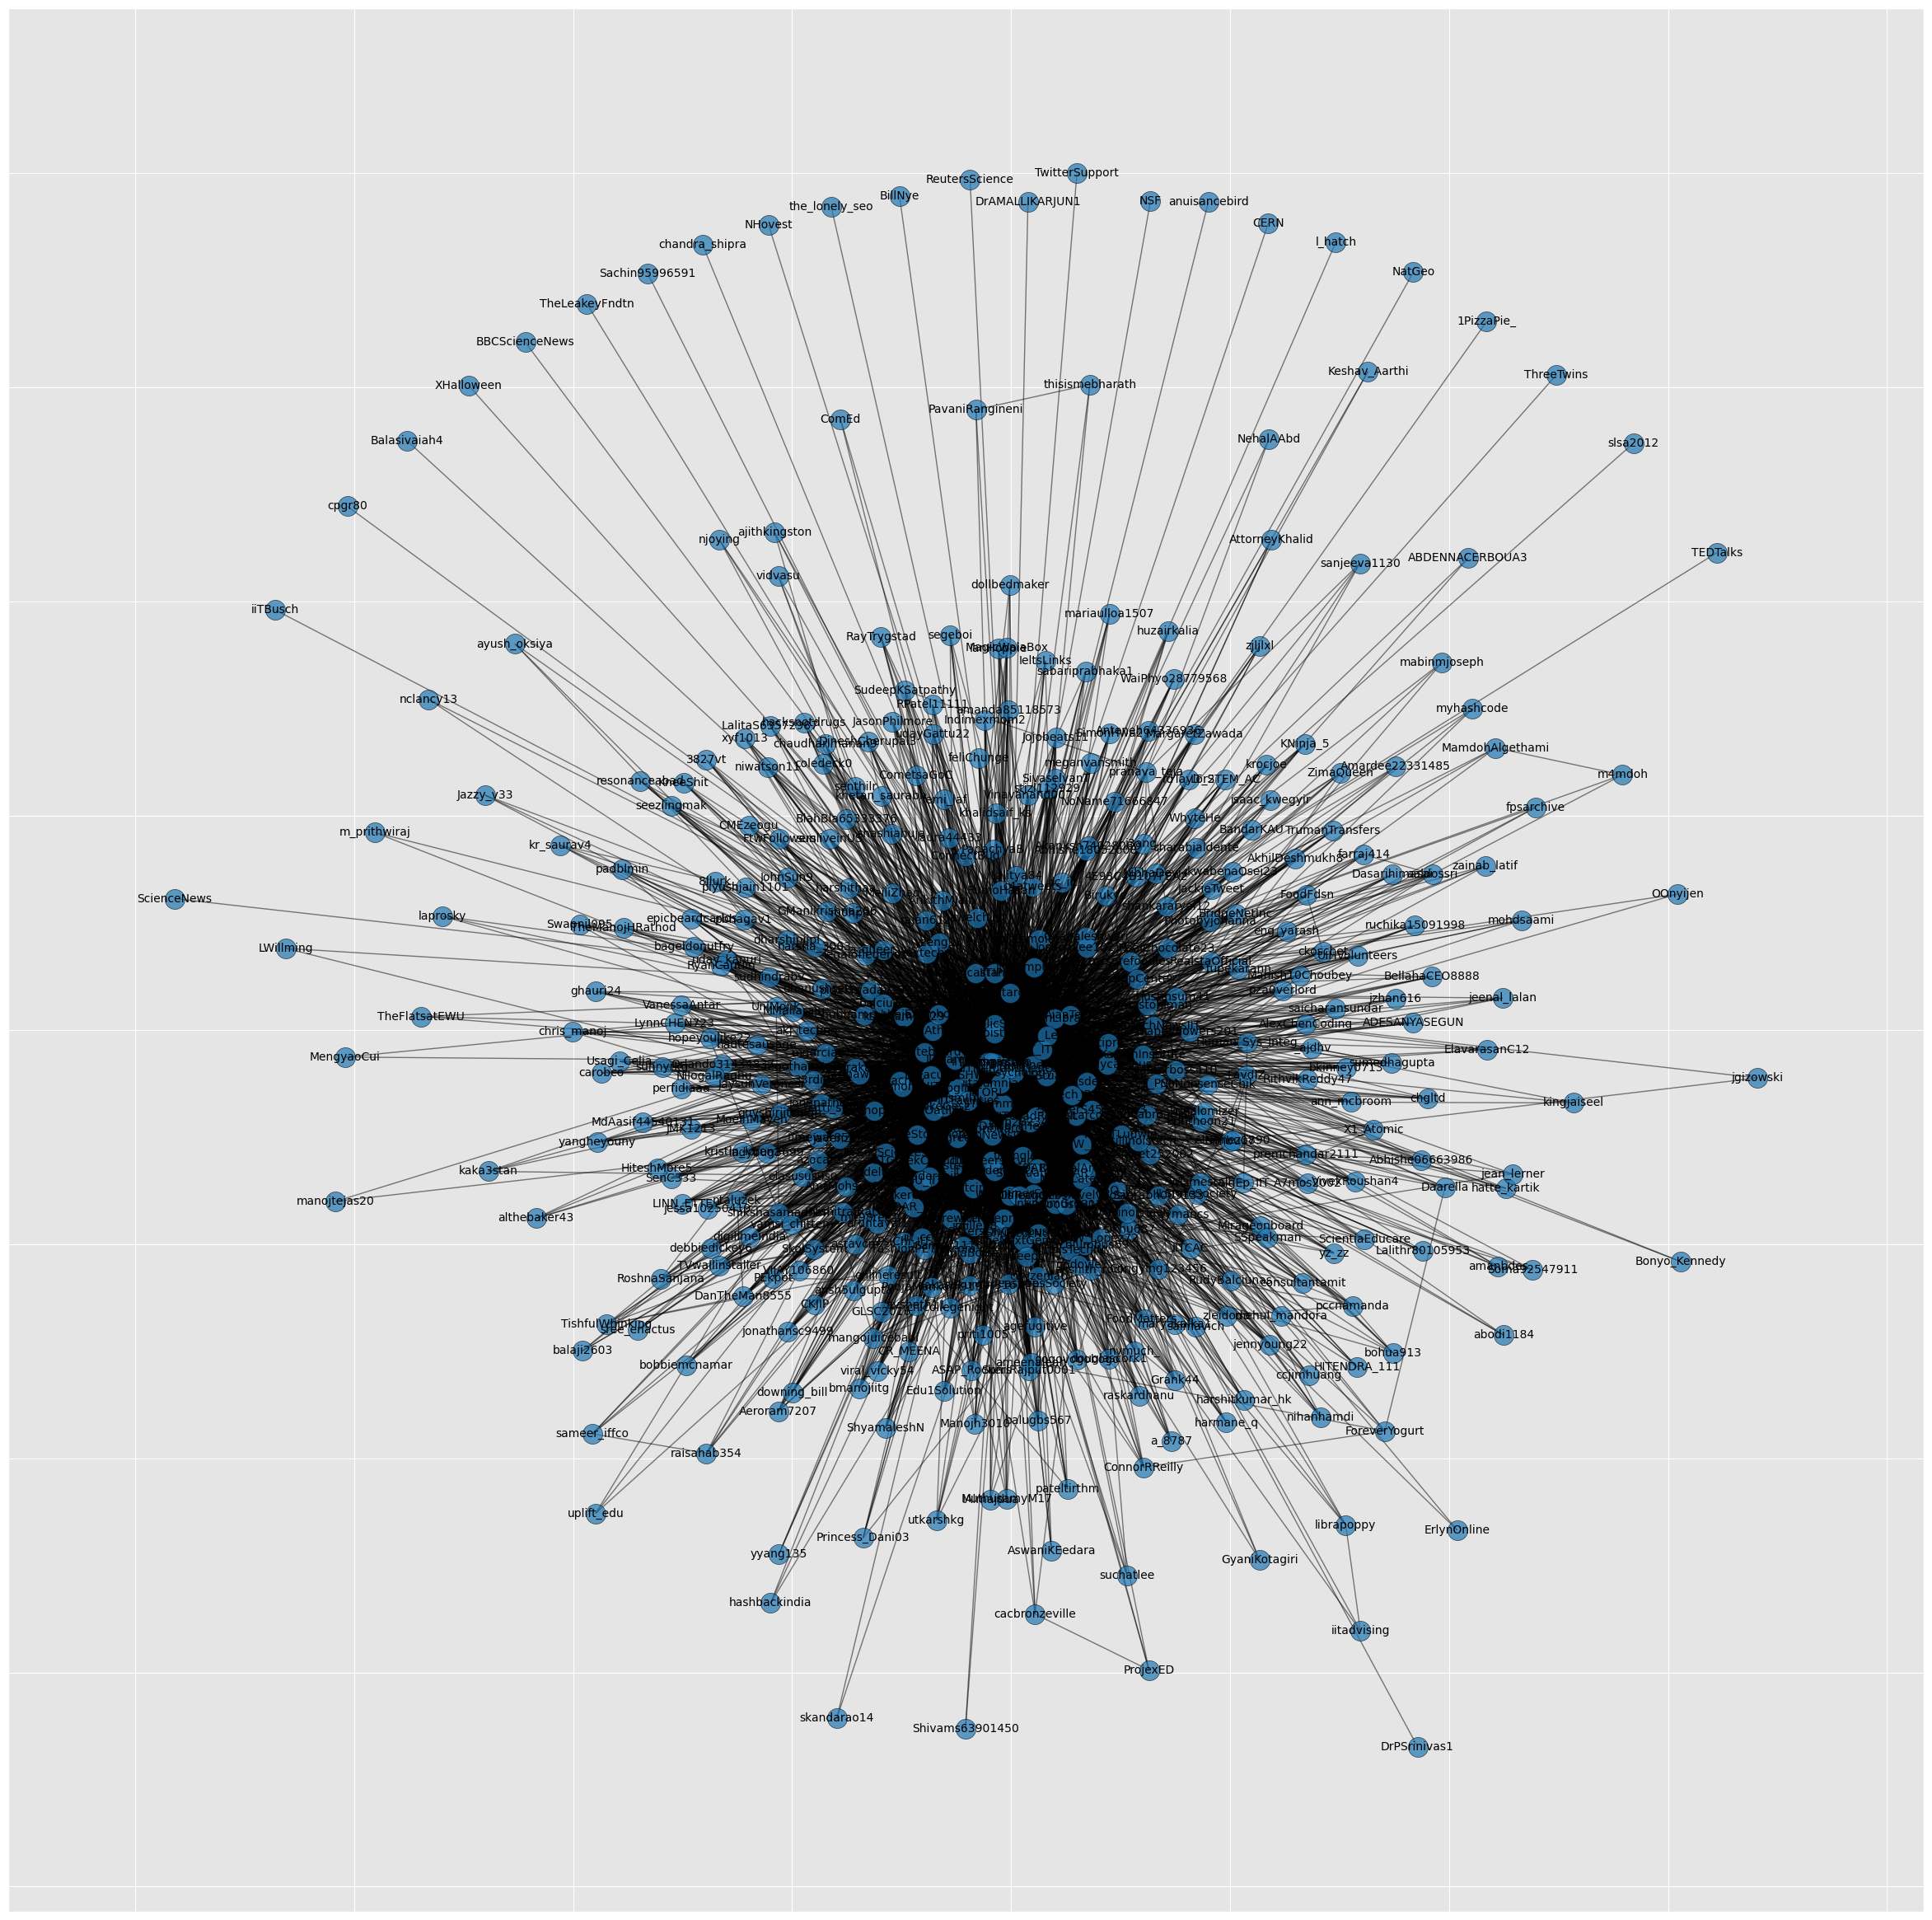

In [47]:
fig, axis = plt.subplots(figsize=(30, 30))
plt.style.use('ggplot')
graph_nodes = nx.draw_networkx_nodes(graph, position, alpha=0.7)
graph_nodes.set_edgecolor('k')
nx.draw_networkx_labels(graph, position, font_size=10)
nx.draw_networkx_edges(graph, position, width=1.0, alpha=0.5)

In [48]:
print(graph.number_of_nodes(),graph.number_of_edges())

460 6808


### CALUCULATING NETWORK MEASURES

In [49]:
# Caluculating degree of nodes
graph_sort_df = pd.DataFrame(sorted(graph.degree,key=lambda x: x[1],reverse=True))
graph_sort_df.columns=['username','degree']
graph_sort_df.to_csv("./Graph_node_degrees.csv",index=False)

In [50]:
print(graph_sort_df)
print(graph_sort_df.head(20))
print(graph_sort_df.tail(20))

           username  degree
0            iitarc     459
1     iitalumniassn     304
2     IITCampusLife     283
3      illinoistech     266
4        IITCareers     261
..              ...     ...
455        TEDTalks       1
456  ReutersScience       1
457     ScienceNews       1
458          NatGeo       1
459            CERN       1

[460 rows x 2 columns]
           username  degree
0            iitarc     459
1     iitalumniassn     304
2     IITCampusLife     283
3      illinoistech     266
4        IITCareers     261
5    IITSci_Letters     245
6     GalvinLibrary     240
7      IITCommunity     218
8   IITHumanScience     210
9    IITEngineering     204
10     IITAdmission     194
11    IITFacilities     192
12        IITStuart     186
13          IIT_HUM     184
14    IITPsychology     174
15           iitsga     173
16  ILTechAthletics     169
17          IIT_ITM     164
18  IIT_OneStopShop     162
19   IITGradRecruit     157
           username  degree
440      1PizzaPie_     

In [51]:
# Caluculating Close Centrality
close_centrality = nx.closeness_centrality(graph)
close_centrality_df = pd.DataFrame(((a, b) for (a, b) in close_centrality.items()), columns=["username", "close_centrality"])
close_centrality_df.sort_values(by='close_centrality', axis=0, inplace=True, ascending=False)
close_centrality_df.to_csv("./Close_centrality.csv",index=False)

In [52]:
print(close_centrality_df)
print(close_centrality_df.head(20))
print(close_centrality_df.tail(20))

           username  close_centrality
0            iitarc          1.000000
418   iitalumniassn          0.747557
421   IITCampusLife          0.722835
422    illinoistech          0.703988
355      IITCareers          0.698630
..              ...               ...
260      XHalloween          0.500545
424         NHovest          0.500545
32           cpgr80          0.500545
236        slsa2012          0.500545
354  the_lonely_seo          0.500545

[460 rows x 2 columns]
            username  close_centrality
0             iitarc          1.000000
418    iitalumniassn          0.747557
421    IITCampusLife          0.722835
422     illinoistech          0.703988
355       IITCareers          0.698630
429   IITSci_Letters          0.682021
379    GalvinLibrary          0.676991
425     IITCommunity          0.655714
376  IITHumanScience          0.648305
387   IITEngineering          0.642857
417     IITAdmission          0.633978
403    IITFacilities          0.632231
286        II

In [53]:
# Caluculating Betweenness Centrality
between_centrality = nx.betweenness_centrality(graph, normalized=True,endpoints=False)
between_centrality_df = pd.DataFrame(((a, b) for (a, b) in between_centrality.items()), columns=["username", "bet_centrality"])
between_centrality_df.sort_values(by='bet_centrality', axis=0, inplace=True, ascending=False)
between_centrality_df.to_csv("./Betweenness_centrality.csv", index=False)

In [54]:
print(between_centrality_df)
print(between_centrality_df.head(20))
print(between_centrality_df.tail(20))

            username  bet_centrality
0             iitarc        0.381458
418    iitalumniassn        0.062408
421    IITCampusLife        0.054608
422     illinoistech        0.048251
355       IITCareers        0.043706
..               ...             ...
272        suchatlee        0.000000
43         LWillming        0.000000
137   Sachin95996591        0.000000
46    AttorneyKhalid        0.000000
230  Princess_Dani03        0.000000

[460 rows x 2 columns]
            username  bet_centrality
0             iitarc        0.381458
418    iitalumniassn        0.062408
421    IITCampusLife        0.054608
422     illinoistech        0.048251
355       IITCareers        0.043706
429   IITSci_Letters        0.036512
379    GalvinLibrary        0.035127
425     IITCommunity        0.023405
387   IITEngineering        0.021921
376  IITHumanScience        0.018511
286        IITStuart        0.016659
417     IITAdmission        0.015319
403    IITFacilities        0.015225
277          I

In [55]:
# Caluculating Degree Centrality
degree_centrality = nx.degree_centrality(graph)
degree_centrality_df = pd.DataFrame(((a,b) for (a,b) in degree_centrality.items()),columns=["username","degree"])
degree_centrality_df.sort_values(by='degree', axis=0, inplace=True, ascending=False)
degree_centrality_df.to_csv("./Degree_centrality.csv",index=False)

In [56]:
print(degree_centrality_df)
print(degree_centrality_df.head(20))
print(degree_centrality_df.tail(20))

           username    degree
0            iitarc  1.000000
418   iitalumniassn  0.662309
421   IITCampusLife  0.616558
422    illinoistech  0.579521
355      IITCareers  0.568627
..              ...       ...
260      XHalloween  0.002179
424         NHovest  0.002179
32           cpgr80  0.002179
236        slsa2012  0.002179
354  the_lonely_seo  0.002179

[460 rows x 2 columns]
            username    degree
0             iitarc  1.000000
418    iitalumniassn  0.662309
421    IITCampusLife  0.616558
422     illinoistech  0.579521
355       IITCareers  0.568627
429   IITSci_Letters  0.533769
379    GalvinLibrary  0.522876
425     IITCommunity  0.474946
376  IITHumanScience  0.457516
387   IITEngineering  0.444444
417     IITAdmission  0.422658
403    IITFacilities  0.418301
286        IITStuart  0.405229
277          IIT_HUM  0.400871
266    IITPsychology  0.379085
401           iitsga  0.376906
245  ILTechAthletics  0.368192
416          IIT_ITM  0.357298
442  IIT_OneStopShop  0.352

In [57]:
# Caluculating Page Rank
page_rank = nx.pagerank(graph, alpha = 0.8)
page_rank_df = pd.DataFrame(((a, b) for (a, b) in page_rank.items()), columns=["username", "page_rank"])
page_rank_df.sort_values(by='page_rank', axis=0, inplace=True, ascending=False)
page_rank_df.to_csv("./Pagerank.csv",index=False)

In [58]:
print(page_rank_df)
print(page_rank_df.head(20))
print(page_rank_df.tail(20))

            username  page_rank
0             iitarc   0.047126
418    iitalumniassn   0.020935
421    IITCampusLife   0.019644
422     illinoistech   0.018941
355       IITCareers   0.018008
..               ...        ...
354   the_lonely_seo   0.000517
369   chandra_shipra   0.000517
24   DrAMALLIKARJUN1   0.000517
229       1PizzaPie_   0.000517
424          NHovest   0.000517

[460 rows x 2 columns]
            username  page_rank
0             iitarc   0.047126
418    iitalumniassn   0.020935
421    IITCampusLife   0.019644
422     illinoistech   0.018941
355       IITCareers   0.018008
429   IITSci_Letters   0.016679
379    GalvinLibrary   0.016307
425     IITCommunity   0.014008
387   IITEngineering   0.013613
376  IITHumanScience   0.013042
286        IITStuart   0.012203
417     IITAdmission   0.012096
403    IITFacilities   0.011940
277          IIT_HUM   0.011236
245  ILTechAthletics   0.010964
401           iitsga   0.010628
266    IITPsychology   0.010578
416          IIT